# Week 1 - Introduction

By Group XX:

-   Aleksandar Lukic - s194066
-   Paula Barho - s242926
-   Victor Gustav Harbo Rasmussen - s204475

## Part 1: Predictive policing. A case to learn from

Start by reading the article from [sciencemag.org](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens).

We will be using data from [dataSF](https://datasf.org/opendata/).

- According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2024? (hint, when you evaluate the evidence consider the source)

- List and explain some of the possible issues with predictive policing according to the article.


## Part 2: Load some crime-data into your Jupyter notebook

Using pandas, we will be loading data from local files.

In [97]:
import os
import numpy as np
import pandas as pd

### Preamble for Pandas display options

These options enables the Pandas output to be fully displayed and expanded

In [98]:
# Set pandas display options to show all columns for .head command
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Auto-detect the display width
pd.set_option('display.max_colwidth', None) # Show full content of each column

### Get data from .csv

Get the datasets from the data folder in the repository:

In [99]:
# Get path of data directory
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
data_path

'/home/aleksandar-lukic/school/02806_Social_Data/data'

In [100]:
# Load data from csv files
csv_1_name = "Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250210.csv"
csv_2_name = "Police_Department_Incident_Reports__2018_to_Present_20250210.csv"
csv_1_path = os.path.join(data_path, csv_1_name)
csv_2_path = os.path.join(data_path, csv_2_name)
df_1 = pd.read_csv(csv_1_path)
df_2 = pd.read_csv(csv_2_path)

In [101]:
# Sort the data by Year, Month, Day, and Hour in ascending order
df_1 = df_1.sort_values(by=['Date'], ascending=[True], na_position='last')
df_2 = df_2.sort_values(by=['Incident Date'], ascending=[True], na_position='last')

In [102]:
# Display shape of dataframes
print("df_1:", df_1.shape)
print("df_2:", df_2.shape)

df_1: (2129525, 35)
df_2: (930648, 35)


### Examine the datasets

In order to be able to concatinate the two datasets, we must ensure that they are of same diminsonality and naming- and type-conventions.

In [103]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129525 entries, 673743 to 1261538
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [104]:
df_1.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
673743,3000117504134,30001175,4134,ASSAULT,BATTERY,Wednesday,01/01/2003,05:00,SOUTHERN,NONE,2ND ST / TOWNSEND ST,-122.390531,37.780607,POINT (-122.39053140418702 37.7806070798243),31.0,1.0,10.0,8.0,6.0,2.0,9.0,28856.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,31.0
1952080,3000242426080,30002424,26080,OTHER OFFENSES,CONSPIRACY,Wednesday,01/01/2003,15:15,TENDERLOIN,"ARREST, BOOKED",0 Block of JONES ST,-122.412193,37.781605,POINT (-122.412192555721 37.7816045741252),20.0,5.0,10.0,36.0,7.0,10.0,9.0,28852.0,36.0,17.0,1.0,18.0,1.0,18.0,6.0,2.0,1.0,1.0,1.0,NaN,20.0
1700311,4023213810125,40232138,10125,FRAUD,"FALSE PRETENSES, GRAND THEFT",Wednesday,01/01/2003,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.40340479147902 37.775420706711),32.0,1.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
1736994,3000199371000,30001993,71000,NON-CRIMINAL,LOST PROPERTY,Wednesday,01/01/2003,12:50,TARAVAL,NONE,ALEMANY BL / SAN JOSE AV,-122.457065,37.710111,POINT (-122.45706544372001 37.7101113688955),66.0,10.0,1.0,28.0,9.0,8.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0
902256,5057472609320,50574726,9320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Wednesday,01/01/2003,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.40340479147902 37.775420706711),32.0,1.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [105]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930648 entries, 580696 to 930455
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     930648 non-null  object 
 1   Incident Date                                         930648 non-null  object 
 2   Incident Time                                         930648 non-null  object 
 3   Incident Year                                         930648 non-null  int64  
 4   Incident Day of Week                                  930648 non-null  object 
 5   Report Datetime                                       930648 non-null  object 
 6   Row ID                                                930648 non-null  int64  
 7   Incident ID                                           930648 non-null  int64  
 8   Incident Number                             

In [106]:
df_2.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
580696,2018/01/01 08:00:00 PM,2018/01/01,20:00,2018,Monday,2018/01/01 08:13:00 PM,61911811012,619118,180002366,180013641.0,II,Initial,NaN,11012,Stolen Property,Stolen Property,"Stolen Property, Possession with Knowledge, Receiving",Cite or Arrest Adult,RANKIN ST \ CUSTER AVE,20703000.0,Bayview,Bayview Hunters Point,10.0,10.0,37.746362,-122.391057,POINT (-122.39105679712927 37.74636177868099),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
526020,2018/01/01 11:30:00 PM,2018/01/01,23:30,2018,Monday,2018/01/02 10:03:00 AM,61929907021,619299,180003239,180021174.0,VI,Vehicle Initial,NaN,7021,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,GOUGH ST \ COLTON ST,24404000.0,Southern,Mission,6.0,6.0,37.772344,-122.421068,POINT (-122.42106807582994 37.772343919036),32.0,NaN,NaN,1.0,1.0,NaN,10.0,1.0
886477,2018/01/01 12:00:00 AM,2018/01/01,00:00,2018,Monday,2020/07/14 01:57:00 PM,94363168020,943631,200421296,201961703.0,II,Initial,NaN,68020,Miscellaneous Investigation,Miscellaneous Investigation,Miscellaneous Investigation,Open or Active,08TH ST \ GROVE ST \ HYDE ST \ MARKET ST,24429000.0,Tenderloin,Tenderloin,6.0,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
606962,2018/01/01 12:00:00 AM,2018/01/01,00:00,2018,Monday,2018/05/10 10:39:00 PM,66701868020,667018,180350002,181304575.0,II,Initial,NaN,68020,Miscellaneous Investigation,Miscellaneous Investigation,Miscellaneous Investigation,Open or Active,BEALE ST \ HARRISON ST,24495000.0,Southern,Financial District/South Beach,6.0,6.0,37.787455,-122.391180,POINT (-122.39117965917615 37.78745518601511),30.0,1.0,NaN,NaN,NaN,NaN,10.0,1.0
520039,2018/01/01 10:00:00 PM,2018/01/01,22:00,2018,Monday,2018/01/07 09:32:00 AM,62114471000,621144,180017064,180070936.0,II,Initial,NaN,71000,Lost Property,Lost Property,Lost Property,Open or Active,18TH ST \ CASTRO ST,25813000.0,Mission,Castro/Upper Market,8.0,8.0,37.760889,-122.435001,POINT (-122.4350007026991 37.76088893209152),38.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0


### Shrinking the data

The datasets are very large and contain some informations which we are currently not interested in keeping. Thus, we can extract the columns that are useful and discard the remaining.

In [107]:
# Columns to keep for df_1
columns_to_keep_1 = [
    'Date',
    'Time',
    'Category',
    'DayOfWeek',
    'X',
    'Y',
    'PdDistrict'
]

In [108]:
# Columns to keep for df_2
columns_to_keep_2 = [
    'Incident Date',
    'Incident Time',
    'Incident Category',
    'Incident Day of Week',
    'Latitude',
    'Longitude',
    'Police District'
]

In [109]:
# Extract only the columns specified for keeping
df_1 = df_1[columns_to_keep_1]
df_2 = df_2[columns_to_keep_2]

In [110]:
df_1.head()

,Date,Time,Category,DayOfWeek,X,Y,PdDistrict
673743,01/01/2003,05:00,ASSAULT,Wednesday,-122.390531,37.780607,SOUTHERN
1952080,01/01/2003,15:15,OTHER OFFENSES,Wednesday,-122.412193,37.781605,TENDERLOIN
1700311,01/01/2003,00:01,FRAUD,Wednesday,-122.403405,37.775421,SOUTHERN
1736994,01/01/2003,12:50,NON-CRIMINAL,Wednesday,-122.457065,37.710111,TARAVAL
902256,01/01/2003,00:01,FRAUD,Wednesday,-122.403405,37.775421,SOUTHERN


In [111]:
df_2.head()

,Incident Date,Incident Time,Incident Category,Incident Day of Week,Latitude,Longitude,Police District
580696,2018/01/01,20:00,Stolen Property,Monday,37.746362,-122.391057,Bayview
526020,2018/01/01,23:30,Motor Vehicle Theft,Monday,37.772344,-122.421068,Southern
886477,2018/01/01,00:00,Miscellaneous Investigation,Monday,37.778719,-122.414741,Tenderloin
606962,2018/01/01,00:00,Miscellaneous Investigation,Monday,37.787455,-122.391180,Southern
520039,2018/01/01,22:00,Lost Property,Monday,37.760889,-122.435001,Mission


### Rename the columns

Firstly, we can start by renaming the columns so that the can be joined later on:

In [112]:
df_1 = df_1.rename(columns={
    'Date': 'Date',
    'Time': 'Time',
    'Category': 'Category',
    'DayOfWeek': 'Day of Week',
    "X": "Longitude (X)",
    "Y": "Latitude (Y)",
    'PdDistrict': 'Police District'
    }
)

df_2 = df_2.rename(columns={
    'Incident Date': 'Date',
    'Incident Time': 'Time',
    'Incident Category': 'Category',
    'Incident Day of Week': 'Day of Week',
    'Longitude': 'Longitude (X)',
    'Latitude': 'Latitude (Y)',
    'Police District': 'Police District'
    }
)

### Align date and time formats

The two datasets abide by different time conventions. Thus, it is neccessary to align them with a single convention.

In [113]:
df_1.head(1)

,Date,Time,Category,Day of Week,Longitude (X),Latitude (Y),Police District
673743,01/01/2003,05:00,ASSAULT,Wednesday,-122.390531,37.780607,SOUTHERN


In [114]:
df_2.head(1)

,Date,Time,Category,Day of Week,Latitude (Y),Longitude (X),Police District
580696,2018/01/01,20:00,Stolen Property,Monday,37.746362,-122.391057,Bayview


In [115]:
# Parsing the date and time
df_1_time = pd.DataFrame(df_1)

# Convert "Date" column to datetime format
df_1_time["Date"] = pd.to_datetime(df_1_time["Date"], format="%m/%d/%Y")

# Create new columns from "Date"
df_1_time["Day"] = df_1_time["Date"].dt.day
df_1_time["MonthName"] = df_1_time["Date"].dt.strftime("%B")  # Month name
df_1_time["Year"] = df_1_time["Date"].dt.year

# Extract the hour from the "Time" column to create "TimeOfDay"
df_1_time["Hour"] = pd.to_datetime(df_1_time["Time"], format="%H:%M").dt.hour

# Drop the original "Date" and "Time" columns
df_1_time = df_1_time.drop(columns=["Date", "Time"])

In [116]:
# Parsing the date and time
df_2_time = pd.DataFrame(df_2)

# Convert "Date" column to datetime format
df_2_time["Date"] = pd.to_datetime(df_2_time["Date"], format="%Y/%m/%d")

# Create new columns from "Date"
df_2_time["Day"] = df_2_time["Date"].dt.day
df_2_time["MonthName"] = df_2_time["Date"].dt.strftime("%B")  # Month name
df_2_time["Year"] = df_2_time["Date"].dt.year

# Extract the hour from the "Time" column to create "TimeOfDay"
df_2_time["Hour"] = pd.to_datetime(df_2_time["Time"], format="%H:%M").dt.hour

# Drop the original "Date" and "Time" columns
df_2_time = df_2_time.drop(columns=["Date", "Time"])

In [117]:
# Add new column with month number based on month name
df_1_time["Month"] = pd.to_datetime(df_1_time["MonthName"], format="%B").dt.month
df_2_time["Month"] = pd.to_datetime(df_2_time["MonthName"], format="%B").dt.month

In [118]:
df_1_time.head(1)

,Category,Day of Week,Longitude (X),Latitude (Y),Police District,Day,MonthName,Year,Hour,Month
673743,ASSAULT,Wednesday,-122.390531,37.780607,SOUTHERN,1,January,2003,5,1


In [119]:
df_2_time.head(1)

,Category,Day of Week,Latitude (Y),Longitude (X),Police District,Day,MonthName,Year,Hour,Month
580696,Stolen Property,Monday,37.746362,-122.391057,Bayview,1,January,2018,20,1


In [120]:
# Override the original dataframes with the new ones
df_1 = df_1_time
df_2 = df_2_time

### Align Category and Police Department columns

The two datasets both store some lookup values for the Category and Police Department columns respectivily. However, the values are not formated the same and thus will not be seen as equal to each other. Therefore, we need to align these manually.

In [121]:
print(df_1['Category'].unique())

['ASSAULT' 'OTHER OFFENSES' 'FRAUD' 'NON-CRIMINAL' 'DRUNKENNESS'
 'VEHICLE THEFT' 'LARCENY/THEFT' 'SUSPICIOUS OCC' 'VANDALISM'
 'EMBEZZLEMENT' 'KIDNAPPING' 'BURGLARY' 'EXTORTION' 'WARRANTS'
 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC' 'WEAPON LAWS' 'BAD CHECKS'
 'MISSING PERSON' 'ROBBERY' 'PROSTITUTION' 'TRESPASS' 'STOLEN PROPERTY'
 'SECONDARY CODES' 'SEX OFFENSES, FORCIBLE' 'DRIVING UNDER THE INFLUENCE'
 'LOITERING' 'DISORDERLY CONDUCT' 'ARSON' 'SUICIDE' 'GAMBLING'
 'LIQUOR LAWS' 'SEX OFFENSES, NON FORCIBLE' 'RECOVERED VEHICLE' 'BRIBERY'
 'PORNOGRAPHY/OBSCENE MAT' 'TREA']


In [122]:
print(df_2['Category'].unique())

['Stolen Property' 'Motor Vehicle Theft' 'Miscellaneous Investigation'
 'Lost Property' 'Larceny Theft' 'Warrant' 'Burglary' 'Non-Criminal'
 'Courtesy Report' 'Fraud' 'Malicious Mischief' 'Weapons Offense'
 'Embezzlement' 'Assault' 'Recovered Vehicle' 'Disorderly Conduct'
 'Other Miscellaneous' 'Weapons Carrying Etc' 'Missing Person'
 'Traffic Violation Arrest' 'Vehicle Impounded' 'Case Closure'
 'Fire Report' 'Suspicious Occ' 'Drug Offense'
 'Forgery And Counterfeiting' 'Robbery'
 'Offences Against The Family And Children' 'Other Offenses' 'Other'
 'Civil Sidewalks' 'Traffic Collision' 'Arson' 'Homicide'
 'Vehicle Misplaced' 'Suicide' 'Sex Offense' 'Gambling' 'Drug Violation'
 'Vandalism' 'Prostitution' 'Human Trafficking (A), Commercial Sex Acts'
 'Rape' 'Liquor Laws' 'Suspicious' 'Motor Vehicle Theft?' nan
 'Weapons Offence' 'Human Trafficking, Commercial Sex Acts'
 'Human Trafficking (B), Involuntary Servitude']


Since the second dataset is capitalized, we can convert it to uppercase.

In [123]:
df_2['Category'] = df_2['Category'].str.upper()

In [124]:
print(df_2['Category'].unique())

['STOLEN PROPERTY' 'MOTOR VEHICLE THEFT' 'MISCELLANEOUS INVESTIGATION'
 'LOST PROPERTY' 'LARCENY THEFT' 'WARRANT' 'BURGLARY' 'NON-CRIMINAL'
 'COURTESY REPORT' 'FRAUD' 'MALICIOUS MISCHIEF' 'WEAPONS OFFENSE'
 'EMBEZZLEMENT' 'ASSAULT' 'RECOVERED VEHICLE' 'DISORDERLY CONDUCT'
 'OTHER MISCELLANEOUS' 'WEAPONS CARRYING ETC' 'MISSING PERSON'
 'TRAFFIC VIOLATION ARREST' 'VEHICLE IMPOUNDED' 'CASE CLOSURE'
 'FIRE REPORT' 'SUSPICIOUS OCC' 'DRUG OFFENSE'
 'FORGERY AND COUNTERFEITING' 'ROBBERY'
 'OFFENCES AGAINST THE FAMILY AND CHILDREN' 'OTHER OFFENSES' 'OTHER'
 'CIVIL SIDEWALKS' 'TRAFFIC COLLISION' 'ARSON' 'HOMICIDE'
 'VEHICLE MISPLACED' 'SUICIDE' 'SEX OFFENSE' 'GAMBLING' 'DRUG VIOLATION'
 'VANDALISM' 'PROSTITUTION' 'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS'
 'RAPE' 'LIQUOR LAWS' 'SUSPICIOUS' 'MOTOR VEHICLE THEFT?' nan
 'WEAPONS OFFENCE' 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'
 'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE']


In [125]:
categories = set(np.concatenate((
    df_1['Category'].unique(), 
    df_2['Category'].unique()
    ), axis=0
))

print("No. of incedent categories:", len(categories))

No. of incedent categories: 69


In [126]:
categories

{'ARSON',
 'ASSAULT',
 'BAD CHECKS',
 'BRIBERY',
 'BURGLARY',
 'CASE CLOSURE',
 'CIVIL SIDEWALKS',
 'COURTESY REPORT',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG OFFENSE',
 'DRUG VIOLATION',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FIRE REPORT',
 'FORGERY AND COUNTERFEITING',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS',
 'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE',
 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 'KIDNAPPING',
 'LARCENY THEFT',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'LOST PROPERTY',
 'MALICIOUS MISCHIEF',
 'MISCELLANEOUS INVESTIGATION',
 'MISSING PERSON',
 'MOTOR VEHICLE THEFT',
 'MOTOR VEHICLE THEFT?',
 'NON-CRIMINAL',
 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 'OTHER',
 'OTHER MISCELLANEOUS',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'RAPE',
 'RECOVERED VEHICLE',
 'ROBBERY',
 'SECONDARY CODES',
 'SEX OFFENSE',
 'SEX OFFENSES,

Since the naming between the two datasets is a bit off, we adjust the names in the second dataset.

In [127]:
category_mapping = {
    'DRUG VIOLATION': 'DRUG/NARCOTIC',
    'DRUG OFFENSE': 'DRUG/NARCOTIC',
    'LARCENY THEFT': 'LARCENY/THEFT',
    'MALICIOUS MISCHIEF': 'VANDALISM',  
    'MOTOR VEHICLE THEFT': 'VEHICLE THEFT',
    'MOTOR VEHICLE THEFT?': 'VEHICLE THEFT',
    'WEAPONS CARRYING ETC': 'WEAPON LAWS',
    'WEAPONS OFFENCE': 'WEAPON LAWS',
    'WEAPONS OFFENSE': 'WEAPON LAWS',
    
    # Additional mappings for edge cases
    'TRAFFIC VIOLATION ARREST': 'DRIVING UNDER THE INFLUENCE',  # If DUI is included here 
    'SUSPICIOUS OCC': 'TRESPASS',
    'SUSPICIOUS': 'TRESPASS',
    'LIQUOR LAWS': 'DRUNKENNESS'  # If liquor law violations include public drunkenness 
}

# Replace the categories in the dataframes with the new mappings
df_2['Category'] = df_2['Category'].replace(category_mapping)

We can now do the same for the police department column.

In [128]:
df_2['Police District'] = df_2['Police District'].str.upper()

In [129]:
police_districts = set(np.concatenate((
    df_1['Police District'].unique(), 
    df_2['Police District'].unique()
    ), axis=0
))

print("No. of Police Districts:", len(police_districts))

No. of Police Districts: 12


In [130]:
police_districts

{'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'OUT OF SF',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN',
 nan}

### Merging the two datasets into one

Finally, we can now merge the two datasets by aligning their columns and then concatenating them together.

In [131]:
# Ensure that both DataFrames have the same columns in the same order
columns = [
    'Category', 
    'Police District', 
    'Longitude (X)', 
    'Latitude (Y)',  
    'Day of Week',
    'Hour', 
    'Day',
    'Month', 
    'MonthName', 
    'Year'
]

df_1 = df_1[columns]
df_2 = df_2[columns]

Since we are only interested in full years, we will remove the rows relating to 2003 and 2025. Additionally, since there is a overlap of incidents in 2018, we will drop these from the first dataframe in order to avoid duplicate entries.

In [132]:
print("df_1 shape before:", df_1.shape)
df_1 = df_1.loc[df_1["Year"] != 2003]
df_1 = df_1.loc[df_1["Year"] != 2018]
# df_1=df_1.drop(df_1.loc[df_1["Year"] == 2003].index, inplace=True)
# df_1=df_1.drop(df_1.loc[df_1["Year"] == 2018].index, inplace=True)
print("df_1 shape after:",df_1.shape)

print("df_2 shape before:", df_2.shape)
df_2 = df_2.loc[df_2["Year"] != 2025]
# df_2=df_2.drop(df_2.loc[df_2["Year"] == 2025].index, inplace=True)
print("df_2 shape after:",df_2.shape)

df_1 shape before: (2129525, 10)
df_1 shape after: (1941663, 10)
df_2 shape before: (930648, 10)
df_2 shape after: (921323, 10)


In [133]:
df_merged = pd.concat([df_1, df_2], axis=0, ignore_index=True)

In [134]:
df_merged.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
0,MISSING PERSON,TARAVAL,-122.488272,37.752767,Thursday,20,1,1,January,2004
1,VANDALISM,CENTRAL,-122.406670,37.797864,Thursday,3,1,1,January,2004
2,DRUG/NARCOTIC,BAYVIEW,-122.391435,37.738127,Thursday,1,1,1,January,2004
3,ASSAULT,CENTRAL,-122.398267,37.791715,Thursday,1,1,1,January,2004
4,NON-CRIMINAL,TENDERLOIN,-122.417107,37.785324,Thursday,2,1,1,January,2004


In [135]:
# Sort the data by Year, Month, Day, and Hour in ascending order
df_sorted = df_merged.sort_values(
    by=['Year', 'Month', 'Day', 'Hour'], 
    ascending=[True, True, True, True],
    na_position='last'
)

In [136]:
# Reset the index of the sorted DataFrame
df_reindexed = df_sorted.reset_index()
df_reindexed.drop(columns=['index'], inplace=True)

In [137]:
print("df_reindexed:", df_reindexed.shape)

df_reindexed: (2862986, 10)


In [138]:
df_reindexed.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
0,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
1,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,January,2004
2,LARCENY/THEFT,BAYVIEW,-122.402541,37.728700,Thursday,0,1,1,January,2004
3,NON-CRIMINAL,SOUTHERN,-122.403405,37.775421,Thursday,0,1,1,January,2004
4,NON-CRIMINAL,RICHMOND,-122.477371,37.783277,Thursday,0,1,1,January,2004


In [139]:
df_reindexed.tail()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
2862981,LOST PROPERTY,SOUTHERN,-122.390015,37.790829,Tuesday,23,31,12,December,2024
2862982,LOST PROPERTY,NORTHERN,NaN,NaN,Tuesday,23,31,12,December,2024
2862983,LARCENY/THEFT,SOUTHERN,-122.414993,37.770897,Tuesday,23,31,12,December,2024
2862984,OFFENCES AGAINST THE FAMILY AND CHILDREN,CENTRAL,-122.414299,37.800758,Tuesday,23,31,12,December,2024
2862985,FRAUD,MISSION,-122.420937,37.769917,Tuesday,23,31,12,December,2024


In [140]:
# Save the cleaned and merged data to a new csv file
cleaned_data_path = os.path.join(data_path, "Police_Department_Incident_Reports_Complete.csv")
df_reindexed.to_csv(cleaned_data_path, index=False)

### Simple statistics

Now generate the following simple statistics
- Report the total number of crimes in the dataset.
- List the various categories of crime. How many are there?
- List the number of crimes in each category.

In [141]:
# We now want to keep only the rows containing the focus crimes as defined below

focus_crimes = [
    'ASSAULT',
    'BURGLARY',
    'DISORDERLY CONDUCT',
    'DRIVING UNDER THE INFLUENCE',
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'LARCENY/THEFT',
    'PROSTITUTION',
    'ROBBERY',
    'STOLEN PROPERTY',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WEAPON LAWS'
]

# Extract only the rows where the "Category" is in the focus_crimes list
df_focus = df_1[df_1['Category'].isin(focus_crimes)]

print("df_reindexed:", df_reindexed.shape)
print("df_focus:", df_focus.shape)
print(df_focus['Police District'].unique())

df_reindexed: (2862986, 10)
df_focus: (1129465, 10)
['CENTRAL' 'BAYVIEW' 'NORTHERN' 'RICHMOND' 'SOUTHERN' 'INGLESIDE'
 'TENDERLOIN' 'MISSION' 'PARK' 'TARAVAL' nan]


In [142]:
# Printing total number of crimes
total_crimes = df_reindexed.shape[0]
print(f"Total number of crimes: {total_crimes}")

# List the number of crimes in each category
category_counts = df_focus['Category'].value_counts()
print("Number of crimes in each category:")
print(category_counts)

Total number of crimes: 2862986
Number of crimes in each category:
Category
LARCENY/THEFT                  438180
ASSAULT                        151749
VEHICLE THEFT                  109483
DRUG/NARCOTIC                  106568
VANDALISM                      105556
BURGLARY                        82958
ROBBERY                         50304
WEAPON LAWS                     19201
TRESPASS                        17280
PROSTITUTION                    14516
STOLEN PROPERTY                 10417
DRUNKENNESS                      9019
DISORDERLY CONDUCT               8961
DRIVING UNDER THE INFLUENCE      5273
Name: count, dtype: int64


### Exercise 2: The types of crimes.

- We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?

The most commonly occurring category of crime is larceny/theft and the lest frequently occurring one is drunkenness. 

- Did you run into categories changing across your two data periods? If yes, think about how to deal with those issues. There's no right answer but reflect on your decisions. (And don't spend too much energy on this, since we'll only be working on a subset of the crimes long-term, see Focus Crimes below.)

Few categories overlap, naming is different, the number of crimes reported increases drastically. We only kept the same categories across both data sets. 

- Create a bar-plot over crime occurrences. 

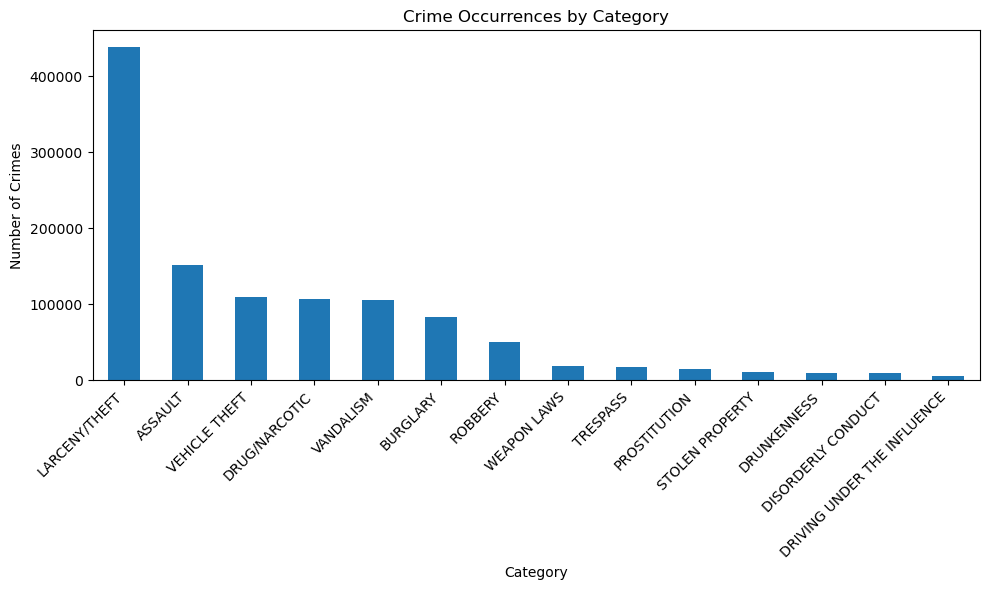

In [143]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')

# Add title and labels
plt.title('Crime Occurrences by Category')
plt.xlabel('Category')
plt.ylabel('Number of Crimes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Exercise 3: Temporal patterns.

- What is the year with most crimes?
- What is the year with the fewest crimes?.
- Create a barplot of crimes-per-year (years on the -axis, crime-counts on the -axis).

The year with the most crimes is 2018 with 151581 crimes.
The year with the fewest crimes is 2024 with 108434 crimes.


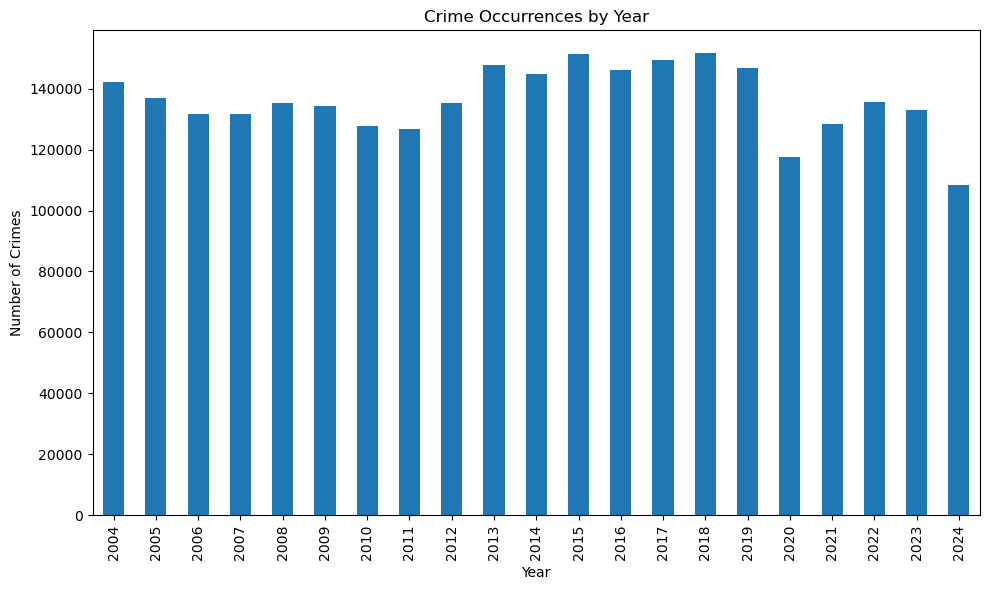

In [144]:
# Group by year and count the number of crimes
yearly_crime_counts = df_reindexed['Year'].value_counts()

# Find the year with the most crimes
year_most_crimes = yearly_crime_counts.idxmax()
most_crimes = yearly_crime_counts.max()

# Find the year with the fewest crimes
year_fewest_crimes = yearly_crime_counts.idxmin()
fewest_crimes = yearly_crime_counts.min()

print(f"The year with the most crimes is {year_most_crimes} with {most_crimes} crimes.")
print(f"The year with the fewest crimes is {year_fewest_crimes} with {fewest_crimes} crimes.")

# Group by year and count the number of crimes, then sort by year
yearly_crime_counts = df_reindexed['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
yearly_crime_counts.plot(kind='bar')

# Add title and labels
plt.title('Crime Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Show the plot
plt.tight_layout()
plt.show()

## Part 3: Some simple visualizations

With the cleaned, merged dataset we are now able to compute some simple visualizations.

In [145]:
csv_merged_path = os.path.join(data_path, "Police_Department_Incident_Reports_Complete.csv") 
df = pd.read_csv(csv_merged_path)

print("df merged shape:", df.shape)

df merged shape: (2862986, 10)


In [146]:
df.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
0,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
1,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,January,2004
2,LARCENY/THEFT,BAYVIEW,-122.402541,37.728700,Thursday,0,1,1,January,2004
3,NON-CRIMINAL,SOUTHERN,-122.403405,37.775421,Thursday,0,1,1,January,2004
4,NON-CRIMINAL,RICHMOND,-122.477371,37.783277,Thursday,0,1,1,January,2004


In [147]:
print(df['Category'].value_counts())

Category
LARCENY/THEFT                                   710534
OTHER OFFENSES                                  283559
NON-CRIMINAL                                    272140
ASSAULT                                         209251
VANDALISM                                       169869
VEHICLE THEFT                                   160225
BURGLARY                                        134253
DRUG/NARCOTIC                                   130901
WARRANTS                                         89249
SUSPICIOUS OCC                                   73269
ROBBERY                                          70963
FRAUD                                            67133
OTHER MISCELLANEOUS                              62708
MISSING PERSON                                   61302
RECOVERED VEHICLE                                46084
TRESPASS                                         36461
WEAPON LAWS                                      30979
WARRANT                                          27468
L

Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

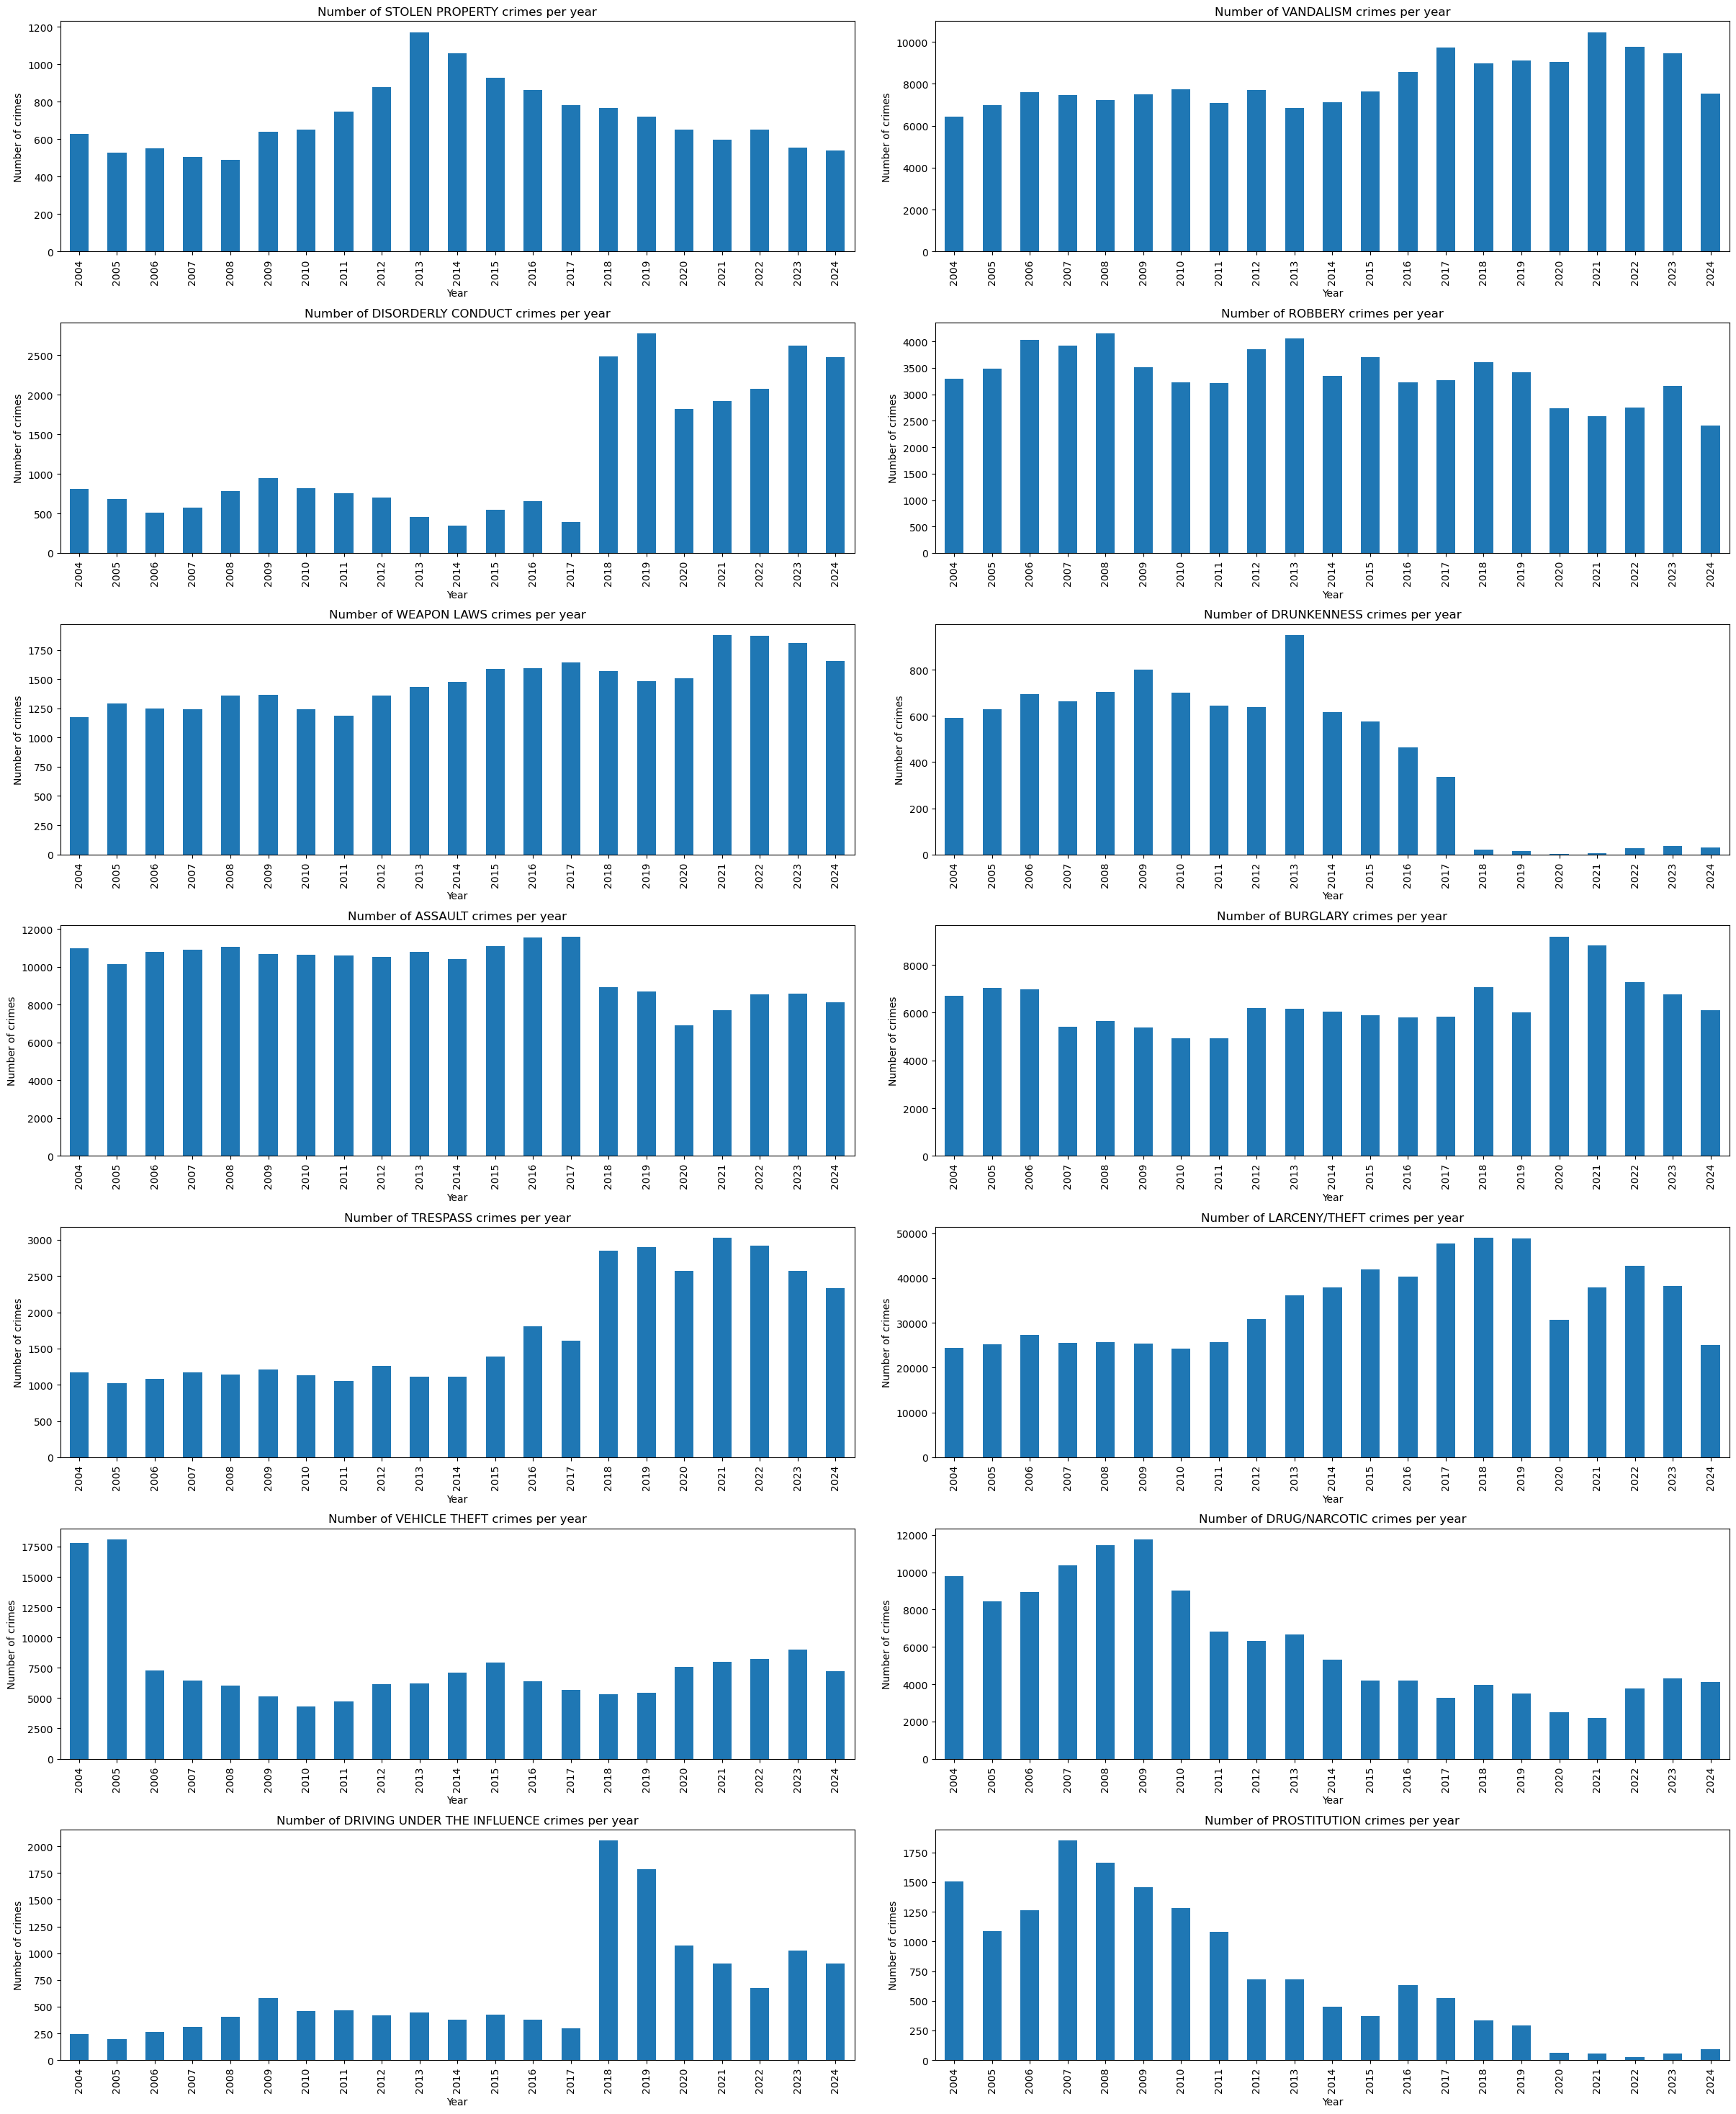

In [148]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#Visualising yearly crimes:
import matplotlib.pyplot as plt
#For each focus crime, create bar chart of number of crimes per year sorted by year\n",

#Show as 2 subplots\n",
fig, axs = plt.subplots(7, 2, figsize=(25, 30))
fig.tight_layout(pad=5.0)  # Increase padding to avoid overlap
for i, crime in enumerate(focuscrimes):
    df[df['Category'] == crime]['Year'].value_counts().sort_index().plot(kind='bar', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Number of ' + crime + ' crimes per year')
    axs[i//2, i%2].set_ylabel('Number of crimes')
    axs[i//2, i%2].set_xlabel('Year')